# Rotational Physics Notebook

In [3]:
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)
from sympy.physics.quantum import Bra, Ket, qapply, Dagger as Dag
from sympy.physics.quantum.cg import CG
np.set_printoptions(precision=3,suppress=True,linewidth=100000, edgeitems=10000)
from sympy.physics.wigner import wigner_9j
from sympy.physics.secondquant import KroneckerDelta
import math
import time
import scipy.linalg
import IPython.display
from IPython.display import Latex

In [4]:
import matplotlib.pyplot as plt
import MarksConstants as mc
import Miscellaneous as misc
import matplotlib.style
matplotlib.style.use('default')

In [5]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [6]:
from IPython.display import Latex

In [7]:
g = 0
u = 1

# Rotation w/ fine structure

## verifying potassium paper equations

### e states

#### first column

In [ ]:
J=2
ell = J-1
s_a = s_b = j_a = j_b = 1/2
j = L = 1
S = Lambda = Sigma = 0
Omega = Lambda+Sigma
#p = (-1)**J
p = 0 if (-1)**J>0 else 1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = N*np.sqrt(2*J)
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = -N*np.sqrt(2*(J+1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
ell = J-1
predictVal = 2*N*np.sqrt(J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = -2*N*np.sqrt(J+1)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 2
ell = J-1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

#### second column

In [24]:
J=4
ell = J-1
s_a = s_b = j_a = j_b = 1/2
j = L = 1
Sigma = 0
S = Lambda = 1

Omega = 0
Sigma = Omega - Lambda
#Omega = Lambda+Sigma
p = 0 if (-1)**J>0 else 1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = 2*N*np.sqrt(J)
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = -2*N*np.sqrt(J+1)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
ell = J-1
predictVal = -N*np.sqrt(2*J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*np.sqrt(2*(J+1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 2
ell = J-1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True 0.5443310539518174 0.5443310539518174
True -0.6085806194501846 -0.6085806194501846
True -0.38490017945975047 -0.3849001794597505
True 0.43033148291193524 0.43033148291193524
True 0.0 0
True 0.0 0


#### third Column

In [28]:
J=6
ell = J-1
s_a = s_b = j_a = j_b = 1/2
j = L = 1

S = 0
#Sigma = 0
Lambda = 1

Omega = 1
Sigma = Omega - Lambda
#Omega = Lambda+Sigma
p = 0 if (-1)**J>0 else 1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = N*np.sqrt(2*(J+1))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*np.sqrt(2*J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
ell = J-1
predictVal = N*2*np.sqrt(J+1)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*2*np.sqrt(J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 2
ell = J-1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True 0.4236592728681617 0.42365927286816163
True 0.3922322702763681 0.392232270276368
True 0.5991446895152781 0.599144689515278
True 0.5547001962252291 0.554700196225229
True 0.0 0
True 0.0 0


#### fourth column

In [29]:
J=6
ell = J-1
s_a = s_b = j_a = j_b = 1/2
j = L = 1

S = 1
Lambda = 0

Omega = 1
Sigma = Omega - Lambda
#Omega = Lambda+Sigma
p = 0 if (-1)**J>0 else 1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = -N*np.sqrt(2*(J+1))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = -N*np.sqrt(2*J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
ell = J-1
predictVal = N*np.sqrt(J+1)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*np.sqrt(J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 2
ell = J-1
predictVal = -N*np.sqrt(3*(J-1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*np.sqrt(3*(J+2))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True -0.4236592728681617 -0.42365927286816163
True -0.3922322702763681 -0.392232270276368
True 0.29957234475763905 0.299572344757639
True 0.2773500981126146 0.2773500981126145
True -0.43852900965351466 -0.4385290096535146
True 0.5547001962252291 0.554700196225229


#### fifth column

In [30]:
J=7
ell = J-1
s_a = s_b = j_a = j_b = 1/2
j = L = 1

S = 1
Lambda = 1

Omega = 1
Sigma = Omega - Lambda
#Omega = Lambda+Sigma
p = 0 if (-1)**J>0 else 1


N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = N*np.sqrt(2*(J+1))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*np.sqrt(2*J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
ell = J-1
predictVal = -N*np.sqrt(J+1)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = -N*np.sqrt(J)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 2
ell = J-1
predictVal = -N*np.sqrt(3*(J-1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = N*np.sqrt(3*(J+2))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True 0.4216370213557839 0.4216370213557839
True 0.39440531887330776 0.3944053188733077
True -0.29814239699997197 -0.29814239699997197
True -0.27888667551135854 -0.27888667551135854
True -0.447213595499958 -0.44721359549995787
True 0.5477225575051661 0.5477225575051661


#### sixth column

In [31]:
J=7
ell = J-1
s_a = s_b = j_a = j_b = 1/2
j = L = 1

S = 1
Lambda = 1
Omega = 2

Sigma = Omega - Lambda
p = 0 if (-1)**J>0 else 1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = 0
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
ell = J-1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 2
ell = J-1
predictVal = -N*np.sqrt(6*(J+2))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+1
predictVal = -N*np.sqrt(6*(J-1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True 0.0 0
True 0.0 0
True 0.0 0
True 0.0 0
True -0.7745966692414834 -0.7745966692414834
True -0.6324555320336759 -0.6324555320336759


### f states

#### total

In [35]:
fS_ae = np.zeros((6,6))
J=21
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 0
Omega = 0

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 0 if (-1)**(J+1)>0 else 1
#p = -1
fS_ae[0,0] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j = 1
fS_ae[1,0] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j_b = 3/2
fS_ae[2,0] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J-2
j = 2
fS_ae[3,0] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J
fS_ae[4,0] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J+2
fS_ae[5,0] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 1
Omega = 0

Sigma = Omega - Lambda
p = 0 if (-1)**(J+1)>0 else 1
#p = -1
fS_ae[0,1] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j = 1
fS_ae[1,1] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j_b = 3/2
fS_ae[2,1] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J-2
j = 2
fS_ae[3,1] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J
fS_ae[4,1] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J+2
fS_ae[5,1] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 0
Lambda = 1
Omega = 1

Sigma = Omega - Lambda
p = 0 if (-1)**(J+1)>0 else 1
#p = -1
fS_ae[0,2] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j = 1
fS_ae[1,2] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j_b = 3/2
fS_ae[2,2] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J-2
j = 2
fS_ae[3,2] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J
fS_ae[4,2] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J+2
fS_ae[5,2] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 0
Omega = 1

Sigma = Omega - Lambda
p = 0 if (-1)**(J+1)>0 else 1
#p = -1
fS_ae[0,3] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j = 1
fS_ae[1,3] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j_b = 3/2
fS_ae[2,3] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J-2
j = 2
fS_ae[3,3] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J
fS_ae[4,3] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J+2
fS_ae[5,3] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 1
Omega = 1
Sigma = Omega - Lambda
p = 0 if (-1)**(J+1)>0 else 1
#p = -1
fS_ae[0,4] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j = 1
fS_ae[1,4] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j_b = 3/2
fS_ae[2,4] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J-2
j = 2
fS_ae[3,4] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J
fS_ae[4,4] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J+2
fS_ae[5,4] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 1
Omega = 2

Sigma = Omega - Lambda
p = 1 if (-1)**J>0 else 0
#p = -1
fS_ae[0,5] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j = 1
fS_ae[1,5] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
j_b = 3/2
fS_ae[2,5] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J-2
j = 2
fS_ae[3,5] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J
fS_ae[4,5] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
ell = J+2
fS_ae[5,5] = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

In [46]:
np.set_printoptions(edgeitems=30, linewidth=100000);
    #formatter=dict(float=lambda x: "%.3g" % x))

In [47]:
display(fS_ae)
display(fS_ae.T@fS_ae)

array([[ 0.57735027, -0.81649658,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.57735027,  0.57735027, -0.57735027,  0.        ],
       [ 0.        ,  0.        , -0.81649658, -0.40824829,  0.40824829,  0.        ],
       [ 0.4880884 ,  0.34513062,  0.        ,  0.49957441,  0.49957441,  0.37882105],
       [-0.40858006, -0.28890973,  0.        , -0.0285133 , -0.0285133 ,  0.86485113],
       [ 0.51136944,  0.3615928 ,  0.        , -0.49961225, -0.49961225,  0.32943456]])

array([[ 1.00000000e+00, -8.35130727e-17,  0.00000000e+00, -3.14309969e-17, -3.14309969e-17,  1.80506561e-17],
       [-8.35130727e-17,  1.00000000e+00,  0.00000000e+00, -4.73097535e-17, -4.73097535e-17, -6.25226523e-19],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00, -1.99143382e-17,  0.00000000e+00],
       [-3.14309969e-17, -4.73097535e-17,  0.00000000e+00,  1.00000000e+00, -1.66645847e-17, -3.77469340e-17],
       [-3.14309969e-17, -4.73097535e-17, -1.99143382e-17, -1.66645847e-17,  1.00000000e+00, -3.77469340e-17],
       [ 1.80506561e-17, -6.25226523e-19,  0.00000000e+00, -3.77469340e-17, -3.77469340e-17,  1.00000000e+00]])

#### First Column

In [37]:
J=21
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 0
Omega = 0

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 0 if (-1)**(J+1)>0 else 1
#p = -1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = np.sqrt(1/3)
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J-2
j = 2
predictVal = np.sqrt(J*(J-1)/(4*J**2-1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J
predictVal = -np.sqrt((2*J*(J+1))/(3*C))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+2
predictVal = np.sqrt(((J+2)*(J+1))/D)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True 0.5773502691896257 0.5773502691896257
True 0.0 0
True 0.0 0
True 0.4880884031398789 0.48808840313987895
True -0.408580064830253 -0.40858006483025305
True 0.511369443758948 0.511369443758948


#### second column

In [38]:
J=28
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 1
Omega = 0

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 0 if (-1)**(J+1)>0 else 1
#p = -1

N = 1/np.sqrt(6*(2*J+1))

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = -np.sqrt(2/3)
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 1
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J-2
j = 2
predictVal = np.sqrt(J*(J-1)/(2*(4*J**2-1)))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J
predictVal = -np.sqrt((J*(J+1))/(3*C))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+2
predictVal = np.sqrt(((J+2)*(J+1))/(2*D))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True -0.816496580927726 -0.816496580927726
True 0.0 0
True 0.0 0
True 0.34723790501531626 0.3472379050153163
True -0.28880854373754017 -0.2888085437375402
True 0.3596509359338702 0.35965093593387026


#### 3rd column

In [39]:
J=4
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 0
Lambda = 1
Omega = 1

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 0 if (-1)**(J+1)>0 else 1
#p = -1

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = 0
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j = 1
predictVal = (-1)**J/np.sqrt(3)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

j_b = 3/2
predictVal = (-1)**J*np.sqrt(2/3)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J-2
j = 2
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

ell = J+2
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal), coefVal,predictVal)

True 0.0 0
False -0.5773502691896257 0.5773502691896258
False -0.816496580927726 0.816496580927726
True 0.0 0
True 0.0 0
True 0.0 0


#### 4th

In [40]:
J=3
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 0
Omega = 1

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 0 if (-1)**(J+1)>0 else 1
#p = -1

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = 0
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

j = 1
predictVal = -(-1)**J/np.sqrt(3)
coefVal = -float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

j_b = 3/2
predictVal = (-1)**J*np.sqrt(1/6)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J-2
j = 2
predictVal = (J*(J-1)/(4*J**2-1))**(1/2)
#predictVal = np.sqrt(J*(J-1)/((2*J-1)*(2*J+1)))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J
predictVal = -np.sqrt(3/(2*C))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J+2
predictVal = -np.sqrt(J*(J+2)/D)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

True 0.0 0
False -0.5773502691896257 0.5773502691896258
True -0.408248290463863 -0.408248290463863
False 0.47809144373375745 0.4140393356054125
True -0.18257418583505536 -0.18257418583505536
True -0.4879500364742666 -0.4879500364742666


#### 5

In [41]:
J=2
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 1
Omega = 1

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 0 if (-1)**(J+1)>0 else 1
#p = -1

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = 0
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

j = 1
predictVal = (-1)**J/np.sqrt(3)
coefVal = -float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

j_b = 3/2
predictVal = -(-1)**J*np.sqrt(1/6)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J-2
j = 2
predictVal = np.sqrt(J*(J-1)/(4*J**2-1))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J
predictVal = -np.sqrt(3/(2*C))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J+2
predictVal = -np.sqrt(J*(J+2)/D)
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

True 0.0 0
True 0.5773502691896257 0.5773502691896258
False 0.408248290463863 -0.408248290463863
False 0.447213595499958 0.3651483716701107
True -0.2672612419124244 -0.2672612419124244
True -0.47809144373375745 -0.47809144373375745


#### 6

In [42]:
J=34
ell = J
s_a = s_b = j_a = j_b = 1/2
L = 1
j = 0

S = 1
Lambda = 1
Omega = 2

Sigma = Omega - Lambda
C = (2*J+3)*(2*J-1)
D = (2*J+3)*(2*J+1)
p = 1 if (-1)**J>0 else 0
#p = -1

coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
predictVal = 0
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

j = 1
predictVal = 0
coefVal = -float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

j_b = 3/2
predictVal = 0
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J-2
j = 2
predictVal = np.sqrt((J+1)*(J+2)/(2*(4*J**2-1)))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J
predictVal = np.sqrt((3*(J-1)*(J+2)/C))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))
print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

ell = J+2
predictVal = np.sqrt(J*(J-1)/(2*D))
coefVal = float(coef_fs(j_a,j_b,j,ell,L,S,s_a,s_b,Lambda, Sigma, Omega,p,J))

print(math.isclose(coefVal,predictVal, rel_tol=1e-7), coefVal,predictVal)

True 0.0 0
True -0.0 0
True 0.0 0
True 0.36915463698711004 0.36915463698711004
True 0.8655701520031057 0.8655701520031059
True 0.33839794023048536 0.33839794023048536


# some helper classes

In [8]:
# from stack exchange...
class OrthogonalKet(Ket):
    @classmethod
    def dual_class(self):
        return OrthogonalBra
    def _eval_innerproduct(self, bra, **hints):
        if len(self.args) != len(bra.args):
            raise ValueError('Cannot multiply a ket that has a different number of labels.')
        for i in range(len(self.args)):
            diff = self.args[i] - bra.args[i]
            diff.simplify()
            if diff.is_nonzero:
                return 0
            if not diff.is_zero:
                return None
        return 1

class OrthogonalBra(Bra):
    @classmethod
    def dual_class(self):
        return OrthogonalKet
OKet = OrthogonalKet
OBra = OrthogonalBra

In [9]:
class multiplyableDict(dict):
    # This class exists so that I can take a basis ref and use it in np.kron()
    # to programatically get the basis ref for multi-particle systems.
    def __mul__(self, other):
        assert(type(other) == type(self))
        newDict = multiplyableDict()
        for key, value in self.items():
            newDict.update({key+"_1": value})
        for key, value in other.items():
            newDict.update({key+"_2": value})
        return newDict

## some functions

In [10]:
def basisSize(J):
    return int(2*J+1)

In [11]:
def createBasisRefs(Lvals, Svals):
    jBasisRef = []
    Jvals = []
    for Lv in Lvals:
        for Sv in Svals:
            Jvals = set(np.arange(abs(Sv - Lv), Sv + Lv+1, 1))
            for Jv in Jvals:
                for mJ in np.arange(-Jv,Jv+1,1):
                    jBasisRef.append(multiplyableDict({"J":Jv, "mJ":mJ, "L":Lv, "S":Sv}))
    lsBasisRef = []
    for Lv in Lvals:
        for mL in np.arange(-Lv,Lv+1,1):
            for Sv in Svals:
                for mS in np.arange(-Sv, Sv+1,1):
                    lsBasisRef.append(multiplyableDict({"L":Lv, "mL":mL, "S":Sv, "mS":mS}))
    return lsBasisRef, jBasisRef, np.kron(lsBasisRef,lsBasisRef), np.kron(jBasisRef,jBasisRef)

In [12]:
def toSympy(state, basis, quiet=False):
    assert(len(state) == len(basis))
    if not quiet:
        print('Basis is: ')
        display(OKet(*basis[0].keys()))
    spState = sp.S(0)
    for stateE, basisE in zip(state, basis):
        if stateE[0] != 0:
            values = sp.S((np.array(list(basisE.values())) * 2).astype(int))
            spState += stateE[0] * OKet(*values / 2)
    return spState

In [13]:
def getColumnState(basis, quantumNums):
    assert(len(basis[0])==len(quantumNums))
    colState = [[0] for _ in range(len(basis))]
    for num, state in enumerate(basis):
        match = True
        for qnum, val in quantumNums.items():
            if val != state[qnum]:
                match = False
        if match:
            colState[num][0] = 1
            return colState
    raise ValueError("No Match! nums were" + str(quantumNums))

In [14]:
def lsToJ(lsBasis, jBasis):
    # expects single atom bases
    assert(len(lsBasis)==len(jBasis))
    op = np.zeros((len(lsBasis),len(jBasis)))
    for lsnum, lsState in enumerate(lsBasis):
        for jnum, jState in enumerate(jBasis):
            L, mL, S, mS = [lsState[key] for key in ['L','mL','S','mS']]
            J, mJ, JL, JS = [jState[key] for key in ['J','mJ', 'L', 'S']]
            # needing to handle this case makes me feel like the actual clebsh gordon coef should be written as
            # <L,mL,S,mS|J,mJ,L2,S2> or so instead of <L,mL,S,mS|J,mJ> as it usually is written. 
            if JL != L or JS != S:
                op[jnum,lsnum] = 0
            else:
                op[jnum,lsnum] += float(CG(L, mL, S, mS, J, mJ).doit())
    return op

In [15]:
def fsOp(basis):
    # expects a two-particle basis, so each element of the basis should 
    # have J_1, mJ_1, L_1, S_1, and J_2, mJ_2, L_2, S_2 values.
    op = np.zeros((len(basis),len(basis)))
    J1,mJ1,L1,S1,J2,mJ2,L2,S2 = [0 for _ in range(8)]
    names = ['J','mJ','L','S']
    for s1num, state1 in enumerate(basis):
        for s2num, state2 in enumerate(basis):
            val = 1
            qNums = [0 for _ in range(8)]
            for num, name in enumerate(names):
                if state2[name+"_1"] != state1[name+"_1"]:
                    # matrix is diagonal.
                    val = 0
                qNums[num] = state1[name+"_1"]
            for num, name in enumerate(names):
                if state2[name+"_2"] != state1[name+"_2"]:
                    # matrix is diagonal.
                    val = 0
                qNums[num+4] = state1[name+"_2"]
            J1,mJ1,L1,S1,J2,mJ2,L2,S2 = qNums
            # the matrix element is A/2 (L1 . S1 + L2 . S2), A=1
            val *= 0.5*(J1*(J1+1)-L1*(L1+1)-S1*(S1+1)+ J2*(J2+1)-L2*(L2+1)-S2*(S2+1) )
            op[s1num,s2num] = val            
    return op

In [16]:
def mpReflectionOp(basis):
    # expects the LSI basis
    # have J_1, mJ_1, L_1, S_1, and J_2, mJ_2, L_2, S_2 values.
    op = np.zeros((len(basis),len(basis)))
    J1,mJ1,L1,S1,J2,mJ2,L2,S2 = [0 for _ in range(8)]
    names = ['L', ]
    for s1num, state1 in enumerate(basis):
        for s2num, state2 in enumerate(basis):
            val = 1
            qNums = [0 for _ in range(8)]
            for num, name in enumerate(names):
                if state2[name+"_1"] != state1[name+"_1"]:
                    # matrix is diagonal.
                    val = 0
                qNums[num] = state1[name+"_1"]
            for num, name in enumerate(names):
                if state2[name+"_2"] != state1[name+"_2"]:
                    # matrix is diagonal.
                    val = 0
                qNums[num+4] = state1[name+"_2"]
            J1,mJ1,L1,S1,J2,mJ2,L2,S2 = qNums
            # the matrix element is A/2 (L1 . S1 + L2 . S2), A=1
            val *= 0.5*(J1*(J1+1)-L1*(L1+1)-S1*(S1+1)+ J2*(J2+1)-L2*(L2+1)-S2*(S2+1) )
            op[s1num,s2num] = val            
    return op

In [17]:
def createMovrePichlerMatrix(states, fsOperator, offset=-1/2):
    num = len(states)
    op = np.array([[0.0 for _ in states] for _ in states])
    for num, _ in enumerate(states):
        op[num,num] = offset
    for num1, state1 in enumerate(states):
        for num2, state2 in enumerate(states):
            op[num1,num2] += state2.T@fsOperator@state1
    return op    

In [18]:
def createBOMatrix(C3, R, *states):
    # expects states to be a list of lists where the low level list has the values of L, Lambda, S,Sigma, and sigma.
    matrix = np.array([[0.0 for _ in states] for _ in states])
    # the matrix is diagonal.
    for num, state in enumerate(states):
        L, Lambda, S, Sigma, sigma = state
        #print(L, Lambda, S, Sigma, sigma)
        p = (-1)**(S+sigma)
        matrix[num,num] = -p*(3*Lambda**2-L*(L+1))/R**3 * C3
        #print(-p*(3*Lambda**2-L*(L+1))/R**3 * C3)
    return matrix

In [19]:
def BohrOppenheimerToAtomic( oalNums, spinNums, sigma, 
                             lsBasis, jBasis, resInJBasis=True ):
    """
    L is the total molecular orbital angular momentum \vec{L} = \vec{l1}+\vec{l2}
    Lambda is the projection of L on the internuclear axis.
    l1 is the orbital angular momentum of atom 1.
    l2 is the orbital angular momentum of atom 2.
    
    S is the total molecular spin angular momentum \vec{s} = \vec{s1}+\vec{s2}
    Sigma is the projection of S on the internuclear axis.
    s1 is the spin angular momentum of atom 1.
    s2 is the spin angular momentum of atom 2.
    
    sigma is the spatial symmetry of the electronic wavefunctions, 
        either 0 for g ("gerude" or symmetric wavefunctions) 
        or 1 for u ("ungerude" or antisymmetric wavefunctions)
    """
    (L, Lambda, la, lb) = oalNums
    (S, Sigma, sa, sb) = spinNums
    state = 0
    p = (-1)**(S+sigma)
    for mla in np.arange(-la,la+1,1):
        for mlb in np.arange(-lb,lb+1,1):
            for msa in np.arange(-sa,sa+1,1):
                for msb in np.arange(-sb,sb+1,1):
                    # CG notation is <j1,mj1,j2,mj2|j3,mj3>
                    oalCoef = float(CG(la,mla,lb,mlb,L,Lambda).doit())
                    spinCoef = float(CG(sa,msa,sb,msb,S,Sigma).doit())
                    if oalCoef == 0 or spinCoef == 0:
                        continue
                    aState1 = getColumnState(lsBasis, {'L':la,'mL':mla,'S':sa,'mS':msa})
                    bState1 = getColumnState(lsBasis, {'L':lb,'mL':mlb,'S':sb,'mS':msb})
                    aState2 = getColumnState(lsBasis, {'L':lb,'mL':mlb,'S':sa,'mS':msa})
                    bState2 = getColumnState(lsBasis, {'L':la,'mL':mla,'S':sb,'mS':msb})
                    # print(oalCoef,spinCoef, np.linalg.norm(aState1), np.linalg.norm(bState1), np.linalg.norm(aState2), np.linalg.norm(bState2))
                    if resInJBasis:
                        lsToJop = lsToJ(lsBasis,jBasis)
                        aState1 = lsToJop@aState1
                        bState1 = lsToJop@bState1
                        aState2 = lsToJop@aState2
                        bState2 = lsToJop@bState2
                    state += oalCoef*spinCoef * (np.kron(aState1,bState1) + p * np.kron(aState2,bState2))
    if (np.linalg.norm(state) == 0):
        raise ValueError('Resulting State had zero norm!')
    state /= np.linalg.norm(state)
    return state

# Calculations

## S+P Alkali Rotationless Calculations

In [20]:
lsBasis, jBasis, lsBasis2, jBasis2 = createBasisRefs([0,1], [1/2])
lsToJOp = lsToJ(lsBasis,jBasis)
fsOperator = fsOp(jBasis2)

In [21]:
# 0mg
sig_3mg_0mg = BohrOppenheimerToAtomic( (1, 0, 1, 0), (1, 0, 1/2, 1/2), g, lsBasis, jBasis );
pi_3g_0mg   = 2**(-1/2)*( BohrOppenheimerToAtomic( (1, -1, 1, 0), (1, 1, 1/2, 1/2), g, lsBasis, jBasis )
                         +BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, -1, 1/2, 1/2), g, lsBasis, jBasis ))
# order matters 
bo_0mg = [(1,0,1,0,g),(1,-1,1,1,g)]
# 0pg
pi_3g_0pg = 2**(-1/2)*( BohrOppenheimerToAtomic( (1, -1, 1, 0), (1, 1, 1/2, 1/2), g, lsBasis, jBasis )
                        -BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, -1, 1/2, 1/2), g, lsBasis, jBasis ))
sig_1pg_0pg = BohrOppenheimerToAtomic( (1, 0, 1, 0), (0, 0, 1/2, 1/2), g, lsBasis, jBasis );
bo_0pg = [(1,0,0,0,g),(1,-1,1,1,g)]
#1g
sig_3pg_1g = BohrOppenheimerToAtomic( (1, 0, 1, 0), (1, 1, 1/2, 1/2), g, lsBasis, jBasis );
pi_3g_1g = BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, 0, 1/2, 1/2), g, lsBasis, jBasis );
pi_1g_1g = BohrOppenheimerToAtomic( (1, 1, 1, 0), (0, 0, 1/2, 1/2), g, lsBasis, jBasis );
bo_1g = [(1,0,1,1,g), (1,1,1,0,g), (1,1,0,0,g)]
#2g
pi_3g_2g = BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, 1, 1/2, 1/2), g, lsBasis, jBasis );
bo_2g = [(1,1,1,1,g)]
# 0mu
sig_1mu_0mu = BohrOppenheimerToAtomic( (1, 0, 1, 0), (0, 0, 1/2, 1/2), u, lsBasis, jBasis );
pi_3u_0mu = 2**(-1/2)*( BohrOppenheimerToAtomic( (1, -1, 1, 0), (1, 1, 1/2, 1/2), u, lsBasis, jBasis )
                        -BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, -1, 1/2, 1/2), u, lsBasis, jBasis ))
bo_0mu = [(1,0,0,0,u),(1,-1,1,1,u)]
# 0pu
sig_3pu_0pu = BohrOppenheimerToAtomic( (1, 0, 1, 0), (1, 0, 1/2, 1/2), u, lsBasis, jBasis );
pi_3u_0pu = 2**(-1/2)*( BohrOppenheimerToAtomic( (1, -1, 1, 0), (1, 1, 1/2, 1/2), u, lsBasis, jBasis )
                        +BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, -1, 1/2, 1/2), u, lsBasis, jBasis ))
bo_0pu = [(1,0,1,0,u), (1,-1,1,1,u)]
#1u
sig_3mg_1u = BohrOppenheimerToAtomic( (1, 0, 1, 0), (1, 1, 1/2, 1/2), u, lsBasis, jBasis );
pi_3g_1u = BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, 0, 1/2, 1/2), u, lsBasis, jBasis );
pi_1g_1u = BohrOppenheimerToAtomic( (1, 1, 1, 0), (0, 0, 1/2, 1/2), u, lsBasis, jBasis );
bo_1u = [(1,0,1,1,u), (1,1,1,0,u), (1,1,0,0,u)]
#2u
pi_3g_2u = BohrOppenheimerToAtomic( (1, 1, 1, 0), (1, 1, 1/2, 1/2), u, lsBasis, jBasis );
bo_2u = [(1,1,1,1,u)]

In [22]:
V_0mg = createMovrePichlerMatrix((sig_3mg_0mg, pi_3g_0mg), fsOperator)
V_0pg = createMovrePichlerMatrix((sig_1pg_0pg, pi_3g_0pg), fsOperator)
V_1g = createMovrePichlerMatrix((sig_3pg_1g, pi_3g_1g, pi_1g_1g), fsOperator)
V_2g = createMovrePichlerMatrix(((pi_3g_2g,)), fsOperator)

V_0mu = createMovrePichlerMatrix((sig_1mu_0mu, pi_3u_0mu), fsOperator)
V_0pu = createMovrePichlerMatrix((sig_3pu_0pu, pi_3u_0pu), fsOperator)
V_1u = createMovrePichlerMatrix((sig_3mg_1u, pi_3g_1u, pi_1g_1u), fsOperator)
V_2u = createMovrePichlerMatrix(((pi_3g_2u,)), fsOperator)

bigMatrix = createMovrePichlerMatrix( ( pi_3g_0mg,sig_3mg_0mg, pi_3g_0pg, sig_1pg_0pg, sig_3pg_1g, pi_3g_1g, pi_1g_1g, pi_3g_2g,
                                        pi_3u_0mu, sig_1mu_0mu, pi_3u_0pu, sig_3pu_0pu, sig_3mg_1u, pi_3g_1u, pi_1g_1u, pi_3g_2u), 
                                        fsOperator )

bigMatrix.shape

### Rubidium 87 Calculation

In [23]:
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
transFreq = 2*np.pi*(mc.Rb87_D2LineFrequency+mc.Rb87_D1LineFrequency)/2
DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h
C_3_val = 3*mc.hbar*mc.c**3/(4*lifetime*transFreq**3)# * 1e27 / mc.h
C_3_val = mc.Rb87_C3
print(DeltaVal, C_3_val)

4.7197635548748796e-21 5.94492796981645e-48


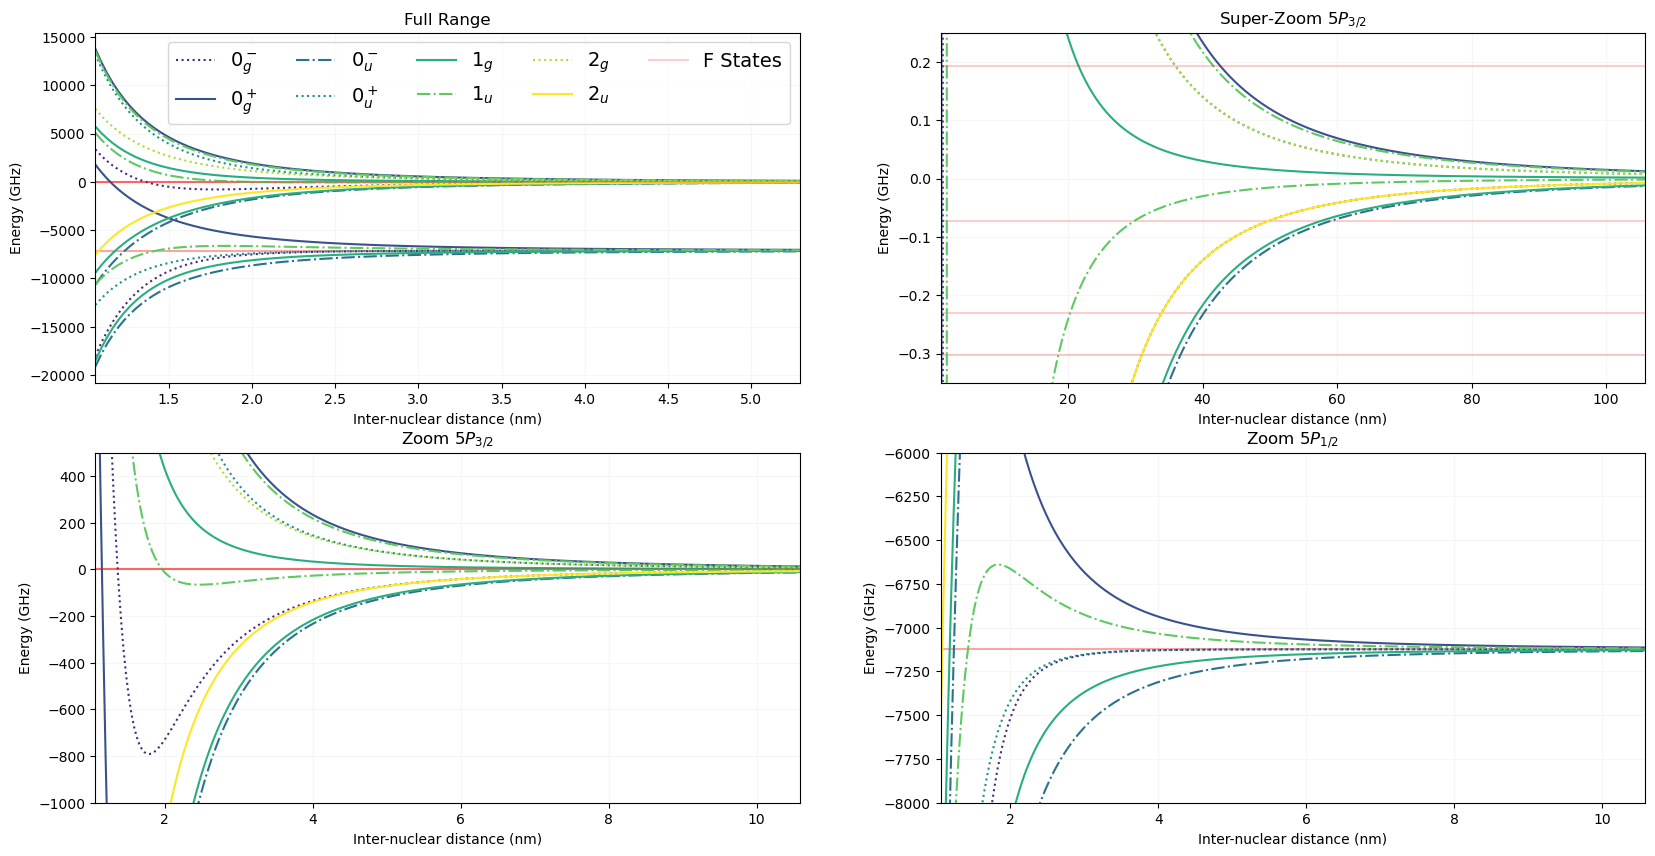

In [24]:
fig, axs = plt.subplots(2,2,figsize=(20,10))
Rvals = np.linspace( 20*mc.a0, 2000*mc.a0, 3000 )
potentialList = [V_0mg, V_0pg, V_0mu, V_0pu, V_1g, V_1u, V_2g, V_2u]
BohrOppenheimerStates = [bo_0mg, bo_0pg, bo_0mu, bo_0pu, bo_1g, bo_1u, bo_2g, bo_2u]
names=[r'$0^-_g$',r'$0^+_g$',r'$0^-_u$',r'$0^+_u$',r'$1_g$',r'$1_u$', r'$2_g$', r'$2_u$']
linestyles=[':','-','-.',':','-','-.',':','-','-.',':','-','-.']
colors, _ = misc.getColors(len(potentialList), cmStr='viridis')
data = [[] for _ in range(len(potentialList)+2)]
for matrixnum, (name, potentialMatrix, c_, boStates) in enumerate(zip(names, potentialList, colors, BohrOppenheimerStates)):
    for rv in Rvals:
        rMatrix = createBOMatrix(C_3_val, rv, *boStates).astype(float) + potentialMatrix * 2 * DeltaVal / 3
        data[matrixnum].append(sorted(np.linalg.eigvals(rMatrix)))
for ax in axs.flatten():
    ax.axhline(-0.0729113, alpha=0.2,color='r')
    ax.axhline(-0.2298518, alpha=0.2,color='r')
    ax.axhline(-0.30207388, alpha=0.2,color='r')
    ax.axhline(-DeltaVal* 1e-9 / mc.h+0.306246, alpha=0.2,color='r')
    ax.axhline(-DeltaVal* 1e-9 / mc.h-0.510410, alpha=0.2,color='r')
    for name, mdata, c_, linestyle in zip(names, data, colors, linestyles):
        if len(np.array(mdata).shape) == 2 or len(np.array(mdata).shape) == 3:
            for lineNum, lineData in enumerate(misc.transpose(mdata)):
                ax.plot(Rvals*1e9, np.array(lineData) * 1e-9 / mc.h, 
                        label=name if lineNum == 0 else None, color=c_, linestyle=linestyle)
        else:
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h, 
                    label=name, color=c_, linestyle=linestyle)
    ax.set_xlabel('Inter-nuclear distance (nm)')
    ax.set_ylabel('Energy (GHz)')
    ax.grid(alpha=0.1)
    ax.axhline(0.1937408, alpha=0.2,color='r', label='F States')

axs[0,0].set_title('Full Range')
axs[0,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/20)
axs[0,0].legend(ncol=5,fontsize=14)
axs[1,0].set_title('Zoom $5P_{3/2}$')
axs[1,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
axs[1,0].set_ylim(-1000, 500)
axs[0,1].set_title('Super-Zoom $5P_{3/2}""$')
axs[0,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
axs[0,1].set_ylim(-0.35, 0.25)
axs[1,1].set_title('Zoom $5P_{1/2}$')
axs[1,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
axs[1,1].set_ylim(-8000, -6000);
#plt.savefig('Movre-Pischler.png', dpi=200)

# Rotation

The rotational energy in the hund's e case is given by  
$$
H_{\text{"rot"}} = \frac{\hbar^2}{2\mu R^2}\hat{N}^2 
$$

So I need to compare this to, say, the fine structure or hyperfine splitting to understand how important it is or isn't.  

In [66]:
def BohrOppenheimerToAtomic( oalNums, spinNums, sigma, 
                             lsBasis, jBasis, resInJBasis=True ):
    """
    oalNums = (L, Lambda, la, lb)
    L is the total molecular orbital angular momentum \vec{L} = \vec{l1}+\vec{l2}
    Lambda is the projection of L on the internuclear axis.
    l1 is the orbital angular momentum of atom 1.
    l2 is the orbital angular momentum of atom 2.
    
    spinNums = (S, Sigma, s1, s2)
    S is the total molecular spin angular momentum \vec{s} = \vec{s1}+\vec{s2}
    Sigma is the projection of S on the internuclear axis.
    s1 is the spin angular momentum of atom 1.
    s2 is the spin angular momentum of atom 2.
    
    sigma is the spatial symmetry of the electronic wavefunctions, 
        either 0 for g ("gerude" or symmetric wavefunctions) 
        or 1 for u ("ungerude" or antisymmetric wavefunctions)
    """
    (L, Lambda, la, lb) = oalNums
    (S, Sigma, sa, sb) = spinNums
    state = 0
    p = (-1)**(S+sigma)
    for mla in np.arange(-la,la+1,1):
        for mlb in np.arange(-lb,lb+1,1):
            for msa in np.arange(-sa,sa+1,1):
                for msb in np.arange(-sb,sb+1,1):
                    # CG notation is <j1,mj1,j2,mj2|j3,mj3>
                    oalCoef = float(CG(la,mla,lb,mlb,L,Lambda).doit())
                    spinCoef = float(CG(sa,msa,sb,msb,S,Sigma).doit())
                    aState1 = getColumnState(lsBasis, {'L':la,'mL':mla,'S':sa,'mS':msa})
                    bState1 = getColumnState(lsBasis, {'L':lb,'mL':mlb,'S':sb,'mS':msb})
                    aState2 = getColumnState(lsBasis, {'L':lb,'mL':mlb,'S':sa,'mS':msa})
                    bState2 = getColumnState(lsBasis, {'L':la,'mL':mla,'S':sb,'mS':msb})
                    if resInJBasis:
                        lsToJop = lsToJ(lsBasis,jBasis)
                        aState1 = lsToJop@aState1
                        bState1 = lsToJop@bState1
                        aState2 = lsToJop@aState2
                        bState2 = lsToJop@bState2
                    state += oalCoef*spinCoef * (np.kron(aState1,bState1) + p * np.kron(aState2,bState2))
    if np.linalg.norm(state) == 0:
        raise ValueError("State has zero norm!")
    state /= np.linalg.norm(state)
    
    return state

$$
|\Lambda S \Sigma I \iota p\rangle
$$

In [67]:
def createMovrePichlerMatrix(states, fsOperator, offset=-1/2):
    num = len(states)
    op = np.array([[0.0 for _ in states] for _ in states])
    for num, _ in enumerate(states):
        op[num,num] = offset
    for num1, state1 in enumerate(states):
        for num2, state2 in enumerate(states):
            op[num1,num2] += state2.T@fsOperator@state1
    return op    

From the potassium predisossciation paper:  

$$
\langle j \ell j_a j_b | \Lambda S \Sigma p \rangle_J = (-1)^{\ell - \Omega - J} \frac{1+(-1)^{L_b+\ell + p}(1-\delta_{\Lambda, 0} \delta_{\Sigma, 0})}{2-\delta_{\Lambda, 0}\delta_{\Sigma, 0}}  \sqrt{ \breve{S}\breve{j_a}\breve{j_b}\breve{L}} \langle \ell 0|jJ,-\Omega\Omega\rangle\langle j\Omega|LS\Lambda\Sigma\rangle
   \begin{Bmatrix} 
      L_a & S_a & j_a  \\ 
      L_b & S_b & j_b  \\ 
      L & S & j
   \end{Bmatrix}
$$

In [68]:
def createRotationalCouplingMatrix(caseE_Basis):
    # creates the matrix in case E, needs to be transformed to case A basis to calculate properly.
    res = np.zeros((len(caseE_Basis),len(caseE_Basis)))
    for indE, stateE in enumerate(caseE_Basis):
        ell = stateE['ell']
        res[indE,indE] = ell*(ell+1)
    return res

In [69]:
def create_EtoA_Matrix(caseA_Basis, caseE_Basis):
    res = np.zeros((len(caseA_Basis), len(caseE_Basis)))
    for extraQN in [1,-1]:
        for aind, stateA in enumerate(caseA_Basis):
            for eind, stateE in enumerate(caseE_Basis):
                p = 0 if (-1)**(stateE["J"]+extraQN)>0 else 1
                res[aind, eind] = coef_fs(stateE['ja'], stateE['jb'], stateE['j'], stateE['ell'], stateA["L"], stateA["S"], 1/2, 1/2, stateA["Lambda"], abs(stateA["Omega"]-stateA["Lambda"]), abs(stateA["Omega"]), p, stateE["J"])
    return res

In [70]:
def createBornOppenheimerBasis(Lvals, Svals):
    # Normal Notaion is |L Lambda sigma S Sigma>, but I need to keep track of more than that for the splittings caused by other interactions.
    # Therefore this creates a very big basis which is probably unnecessary, but the size of the matrices isn't actually prohibitive in these 
    # calculations so it's okay to have degeneracies. 
    boBasisRef = []
    for sigma in ["g","u"]:
        for Lv in Lvals:
            for Lambda in np.arange(-Lv,Lv+1,1):
                for Sv in Svals:
                    for Sigma in np.arange(-Sv, Sv+1,1):
                        state = multiplyableDict({"L":Lv, "Lambda": Lambda, "sigma": sigma, "S":Sv, "Omega":Sigma+Lambda})
                        if state not in boBasisRef:
                            boBasisRef.append(state)
    boBasisRef = list(sorted(boBasisRef, key=lambda state: abs(state["Omega"]) + 100 * ord(state["sigma"])))
    boBasisFancy = []
    for state in boBasisRef:
        spinT = 2*state["S"]+1
        omega = state["Omega"]
        parity = state["sigma"]
        LambdaSymbol = "\Sigma" if state["Lambda"]==0 else "\Pi"
        boBasisFancy.append(Latex(r"$^{"+str(spinT)+ "}" + LambdaSymbol + "_{"+ str(abs(omega)) + "," + parity + "}$"))        
    return boBasisRef, boBasisFancy

In [71]:
def createBOMatrix2(C3, R, *states):
    # expects states to be a list of lists where the low level list has the values of L, Lambda, S,Sigma, and sigma.
    matrix = np.array([[0.0 for _ in states] for _ in states])
    # the matrix is diagonal.
    for num, state in enumerate(states):
        #L, Lambda, S, Sigma, sigma = state
        #print(L, Lambda, S, Sigma, sigma)
        sigma = g if state["sigma"]=="g" else u
        p = (-1)**(state["S"]+sigma)
        L = state["L"]
        matrix[num,num] = -p*(3*state["Lambda"]**2-L*(L+1))/R**3 * C3
        #print(-p*(3*Lambda**2-L*(L+1))/R**3 * C3)
    return matrix

In [88]:
boBasisDict[0]

{'L': 1, 'Lambda': -1, 'sigma': 'g', 'S': 1, 'Omega': 0}

In [72]:
boBasisDict, basisLatex = createBornOppenheimerBasis([1],[0,1])
lsBasis, jBasis, lsBasis2, jBasis2 = createBasisRefs([0,1], [1/2])
lsToJOp = lsToJ(lsBasis,jBasis)
fsOperator = fsOp(jBasis2)

In [73]:
movrePischlerStates = []
basisDict, basisLatex = createBornOppenheimerBasis([1],[0,1])
for state in basisDict:
    sigma = g if state["sigma"] == "g" else u
    mpstate = BohrOppenheimerToAtomic( (state["L"], state["Lambda"], 1, 0), (state["S"], state["Omega"] - state["Lambda"], 1/2, 1/2), sigma, lsBasis, jBasis )
    if np.isnan(mpstate[0]):
        continue
    movrePischlerStates.append(mpstate)

In [74]:
bigMatrix = createMovrePichlerMatrix( movrePischlerStates, fsOperator )

In [75]:
lifetime = (mc.Rb87_D1_Lifetime+mc.Rb87_D2_Lifetime)/2
transFreq = 2*np.pi*(mc.Rb87_D2LineFrequency+mc.Rb87_D1LineFrequency)/2
DeltaVal = mc.h*(mc.Rb87_D2LineFrequency-mc.Rb87_D1LineFrequency)# / mc.h
C_3_val = 3*mc.hbar*mc.c**3/(4*lifetime*transFreq**3)# * 1e27 / mc.h
C_3_val = mc.Rb87_C3
print(DeltaVal, C_3_val)

4.7197635548748796e-21 5.94492796981645e-48


In [76]:
def createCaseE_Basis(singleAtomJvals, J):
    caseE_BasisRef = []
    for sigma in ["g","u"]:
        for ja in singleAtomJvals:
            for jb in singleAtomJvals:
                for j in np.arange(abs(ja-jb),ja+jb,1, dtype=float):
                    for ell in np.arange(max([J-2,0]),J+2,1, dtype=float):
                        state = multiplyableDict({"ja":ja, "jb": jb, "j": j, "ell":ell, "sigma":sigma, 'J':J})
                        if state not in caseE_BasisRef:
                            caseE_BasisRef.append(state)
    return caseE_BasisRef

In [77]:
def createCaseE_BasisNew(singleAtomJvals, J):
    # for j and ell, J goes from J=j-ell or zero to J=j+ell
    # given J and j, ell goes from ell=J+j to ell = J-j
    caseE_BasisRef = []
    for sigma in ["g","u"]:
        for ja in [1/2]:
            for jb in singleAtomJvals:
                for j in np.arange(abs(ja-jb),ja+jb+1,1, dtype=float):
                    for ell in np.arange(abs(J-j),J+j+1,1, dtype=float):
                        state = multiplyableDict({"ja":ja, "jb": jb, "j": j, "ell":ell, "sigma":sigma, 'J':J})
                        if state not in caseE_BasisRef:
                            caseE_BasisRef.append(state)
    return caseE_BasisRef

## Rest of calculation

In [ ]:
caseE_basis = createCaseE_BasisNew([1/2,3/2], 0)
print(len(caseE_basis))
display(caseE_basis)

In [ ]:
boBasisDict

In [80]:
etoa = create_EtoA_Matrix(boBasisDict, caseE_basis)

In [81]:
etoa

array([[-0.816,  0.   ,  0.   ,  0.577, -0.816,  0.   ,  0.   ,  0.577],
       [ 0.   , -0.577, -0.816,  0.   ,  0.   , -0.577, -0.816,  0.   ],
       [ 0.577,  0.   ,  0.   ,  0.816,  0.577,  0.   ,  0.   ,  0.816],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [-0.816,  0.   ,  0.   ,  0.577, -0.816,  0.   ,  0.   ,  0.577],
       [ 0.   , -0.577, -0.816,  0.   ,  0.   , -0.

In [82]:
etoa@etoa.T

array([[ 2.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,

In [106]:
#Rvals = np.linspace( 1.33*20*mc.a0, 1.35*20*mc.a0, 2000 )
Rvals = np.linspace( 1*20*mc.a0, 200*20*mc.a0, 2000 )
colors = ['y','r','b','g']
jvals = [3,10,100,1000]
#jvals = np.arange(1,500,20)
colors=['k' for _ in jvals]
superdata = [[] for _ in jvals]
for jvalnum, (J, color) in enumerate(zip(jvals, colors)):
    print(J)
    data = superdata[jvalnum]
    #potentialList = [bigMatrix]
    #BohrOppenheimerStates = [bo_0mg, bo_0pg, bo_0mu, bo_0pu, bo_1g, bo_1u, bo_2g, bo_2u]
    #names=[r'$0^-_g$',r'$0^+_g$',r'$0^-_u$',r'$0^+_u$',r'$1_g$',r'$1_u$', r'$2_g$', r'$2_u$']
    #linestyles=[':','-','-.',':','-','-.',':','-','-.',':','-','-.']
    #data = []
    #J = 40
    caseE_basis = createCaseE_Basis([1/2,3/2], J)
    RCM = createRotationalCouplingMatrix(caseE_basis)#*mc.Rb87_M*1e-9**2/(mc.hbar**2)
    etoa = create_EtoA_Matrix(boBasisDict, caseE_basis)
    rotationalEnergy = etoa@RCM@etoa.conj().T
    for rv in Rvals:
        rMatrix = createBOMatrix2(C_3_val, rv, *basisDict).astype(float) + bigMatrix * 2 * DeltaVal / 3 + rotationalEnergy*mc.hbar**2/(mc.Rb87_M)*(1/rv**2)
        #rMatrix = bigMatrix * 2 * DeltaVal / 3 + rotationalEnergy.astype(float)*(1/rv**2)
        data.append(sorted(np.real(np.linalg.eigvals(rMatrix))))

3
10
100
1000


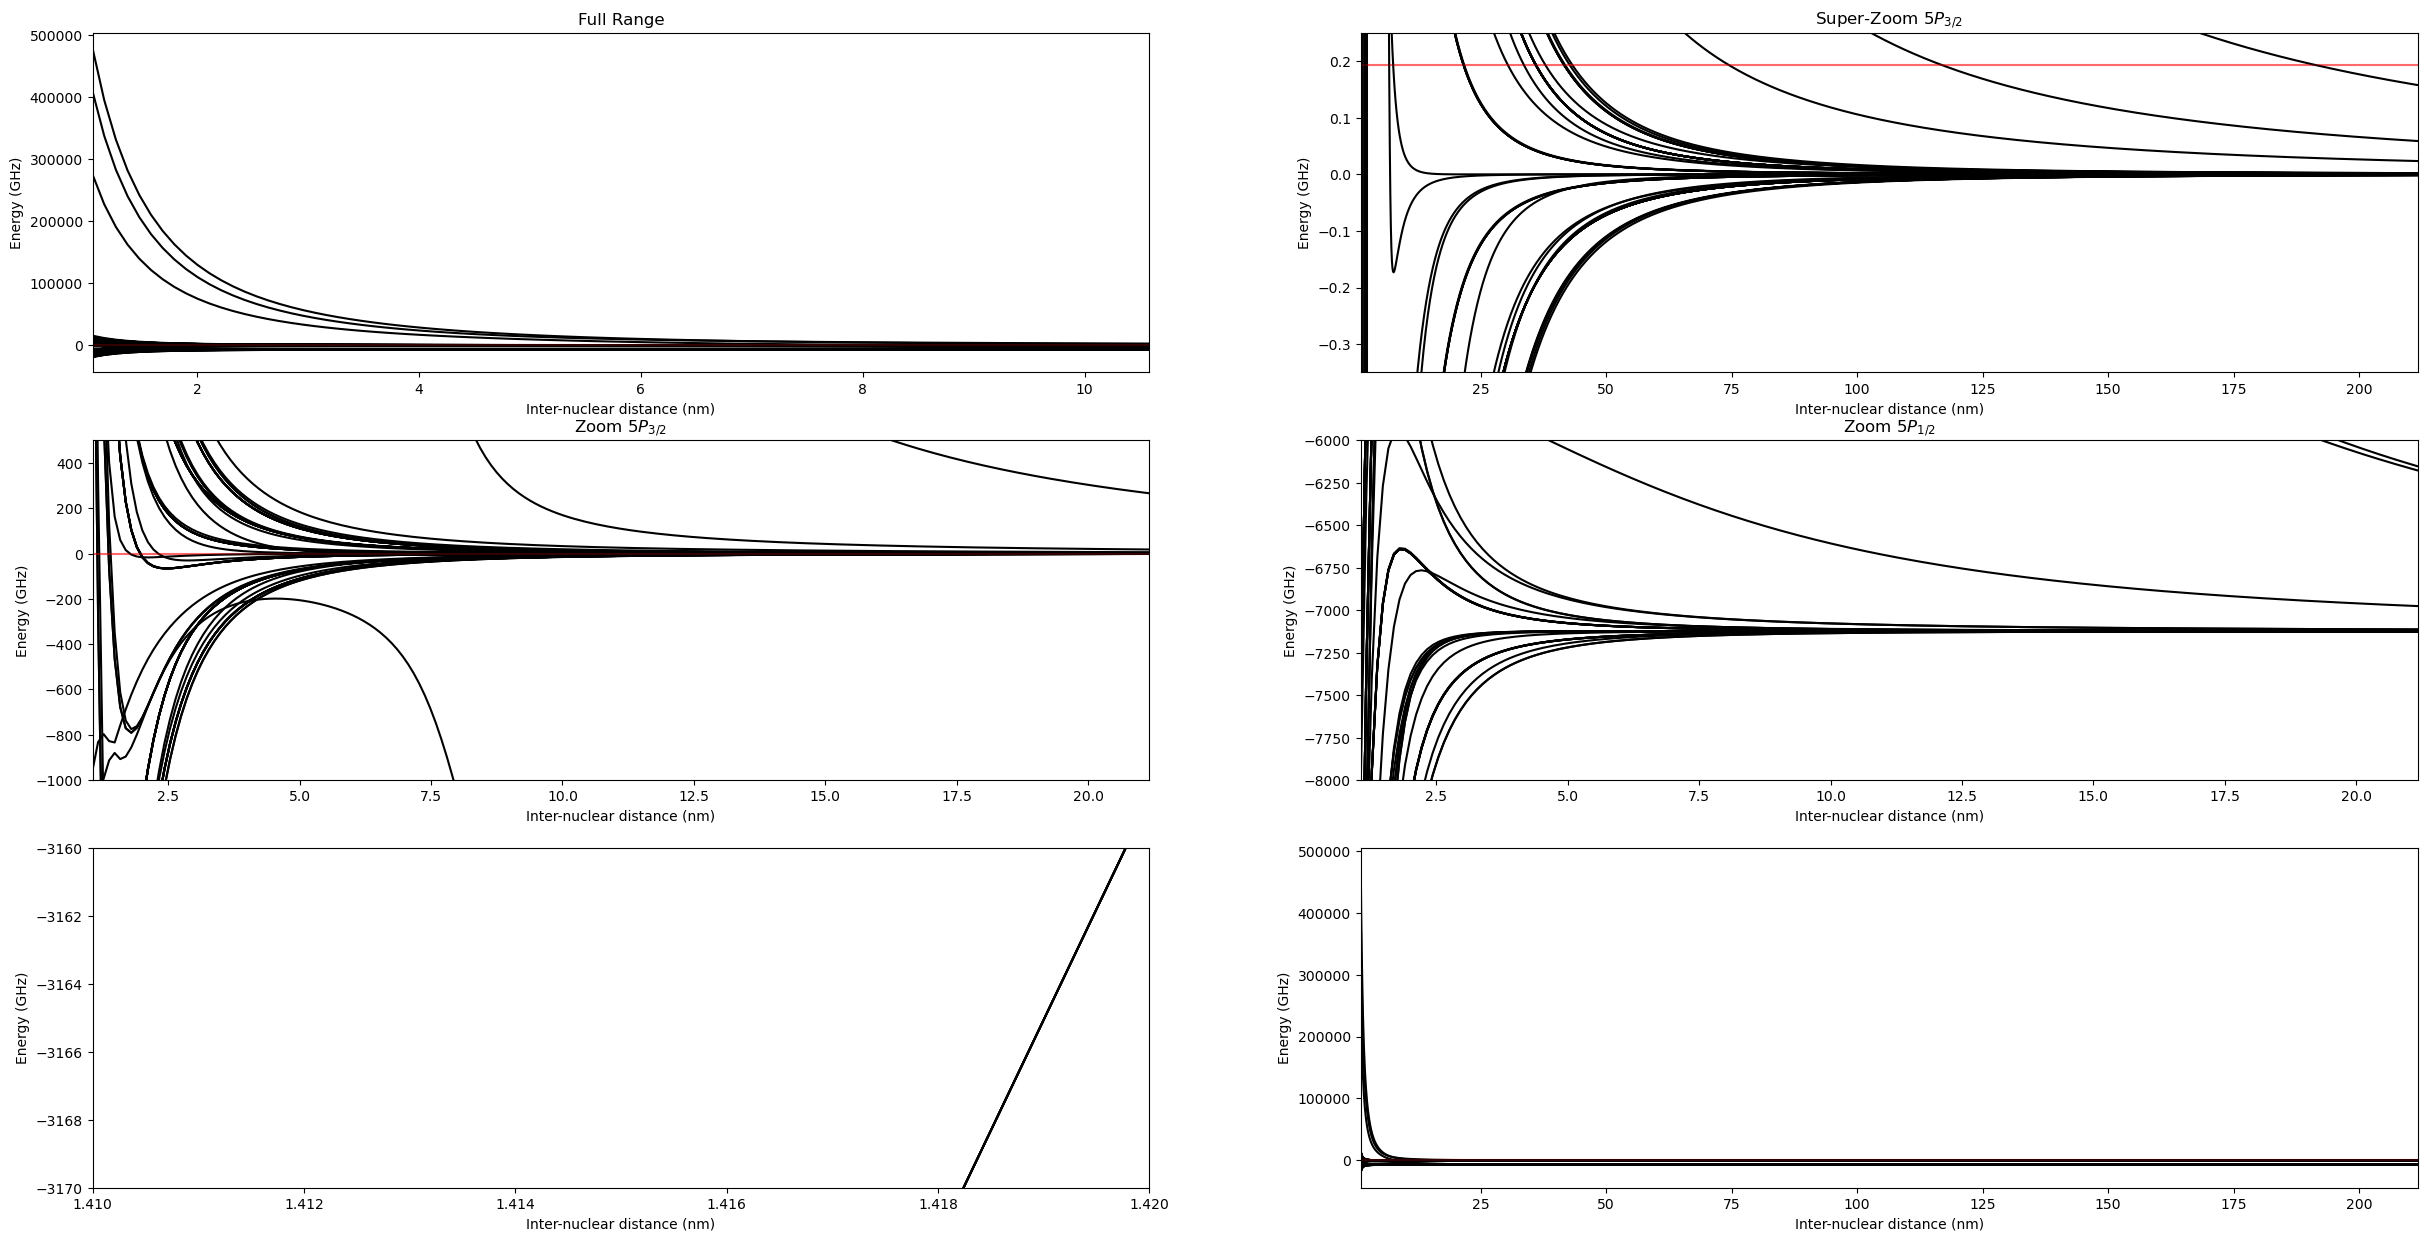

In [107]:
fig, axs = plt.subplots(3,2,figsize=(30,15))
for jvalnum, (J, color) in enumerate(zip(jvals, colors)):
    data = superdata[jvalnum]
    for ax in axs.flatten():
        #ax.axhline(-0.0729113, alpha=0.2,color='r')
        #ax.axhline(-0.2298518, alpha=0.2,color='r')
        #ax.axhline(-0.30207388, alpha=0.2,color='r')
        #ax.axhline(-DeltaVal* 1e-9 / mc.h+0.306246, alpha=0.2,color='r')
        #ax.axhline(-DeltaVal* 1e-9 / mc.h-0.510410, alpha=0.2,color='r')
        for mdata in misc.transpose(data):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h, color=color, linestyle='-')
        ax.set_xlabel('Inter-nuclear distance (nm)')
        ax.set_ylabel('Energy (GHz)')
        ax.grid(alpha=0.1)
        ax.axhline(0.1937408, alpha=0.2,color='r', label='F States')

    axs[0,0].set_title('Full Range')
    axs[0,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/20)
    #axs[0,0].legend(ncol=5,fontsize=14)s
    axs[1,0].set_title('Zoom $5P_{3/2}$')
    axs[1,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
    axs[1,0].set_ylim(-1000, 500)
    axs[0,1].set_title('Super-Zoom $5P_{3/2}""$')
    axs[0,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    axs[0,1].set_ylim(-0.35, 0.25)
    axs[1,1].set_title('Zoom $5P_{1/2}$')
    axs[1,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
    axs[1,1].set_ylim(-8000, -6000);
    axs[2,0].set_xlim(1.41,1.42)
    axs[2,0].set_ylim(-3170,-3160)
    axs[2,1].set_xlim(min(Rvals)*1e9, max(Rvals)*1e9)
    #plt.savefig('Movre-Pischler-Super-Rotating.png', dpi=200)

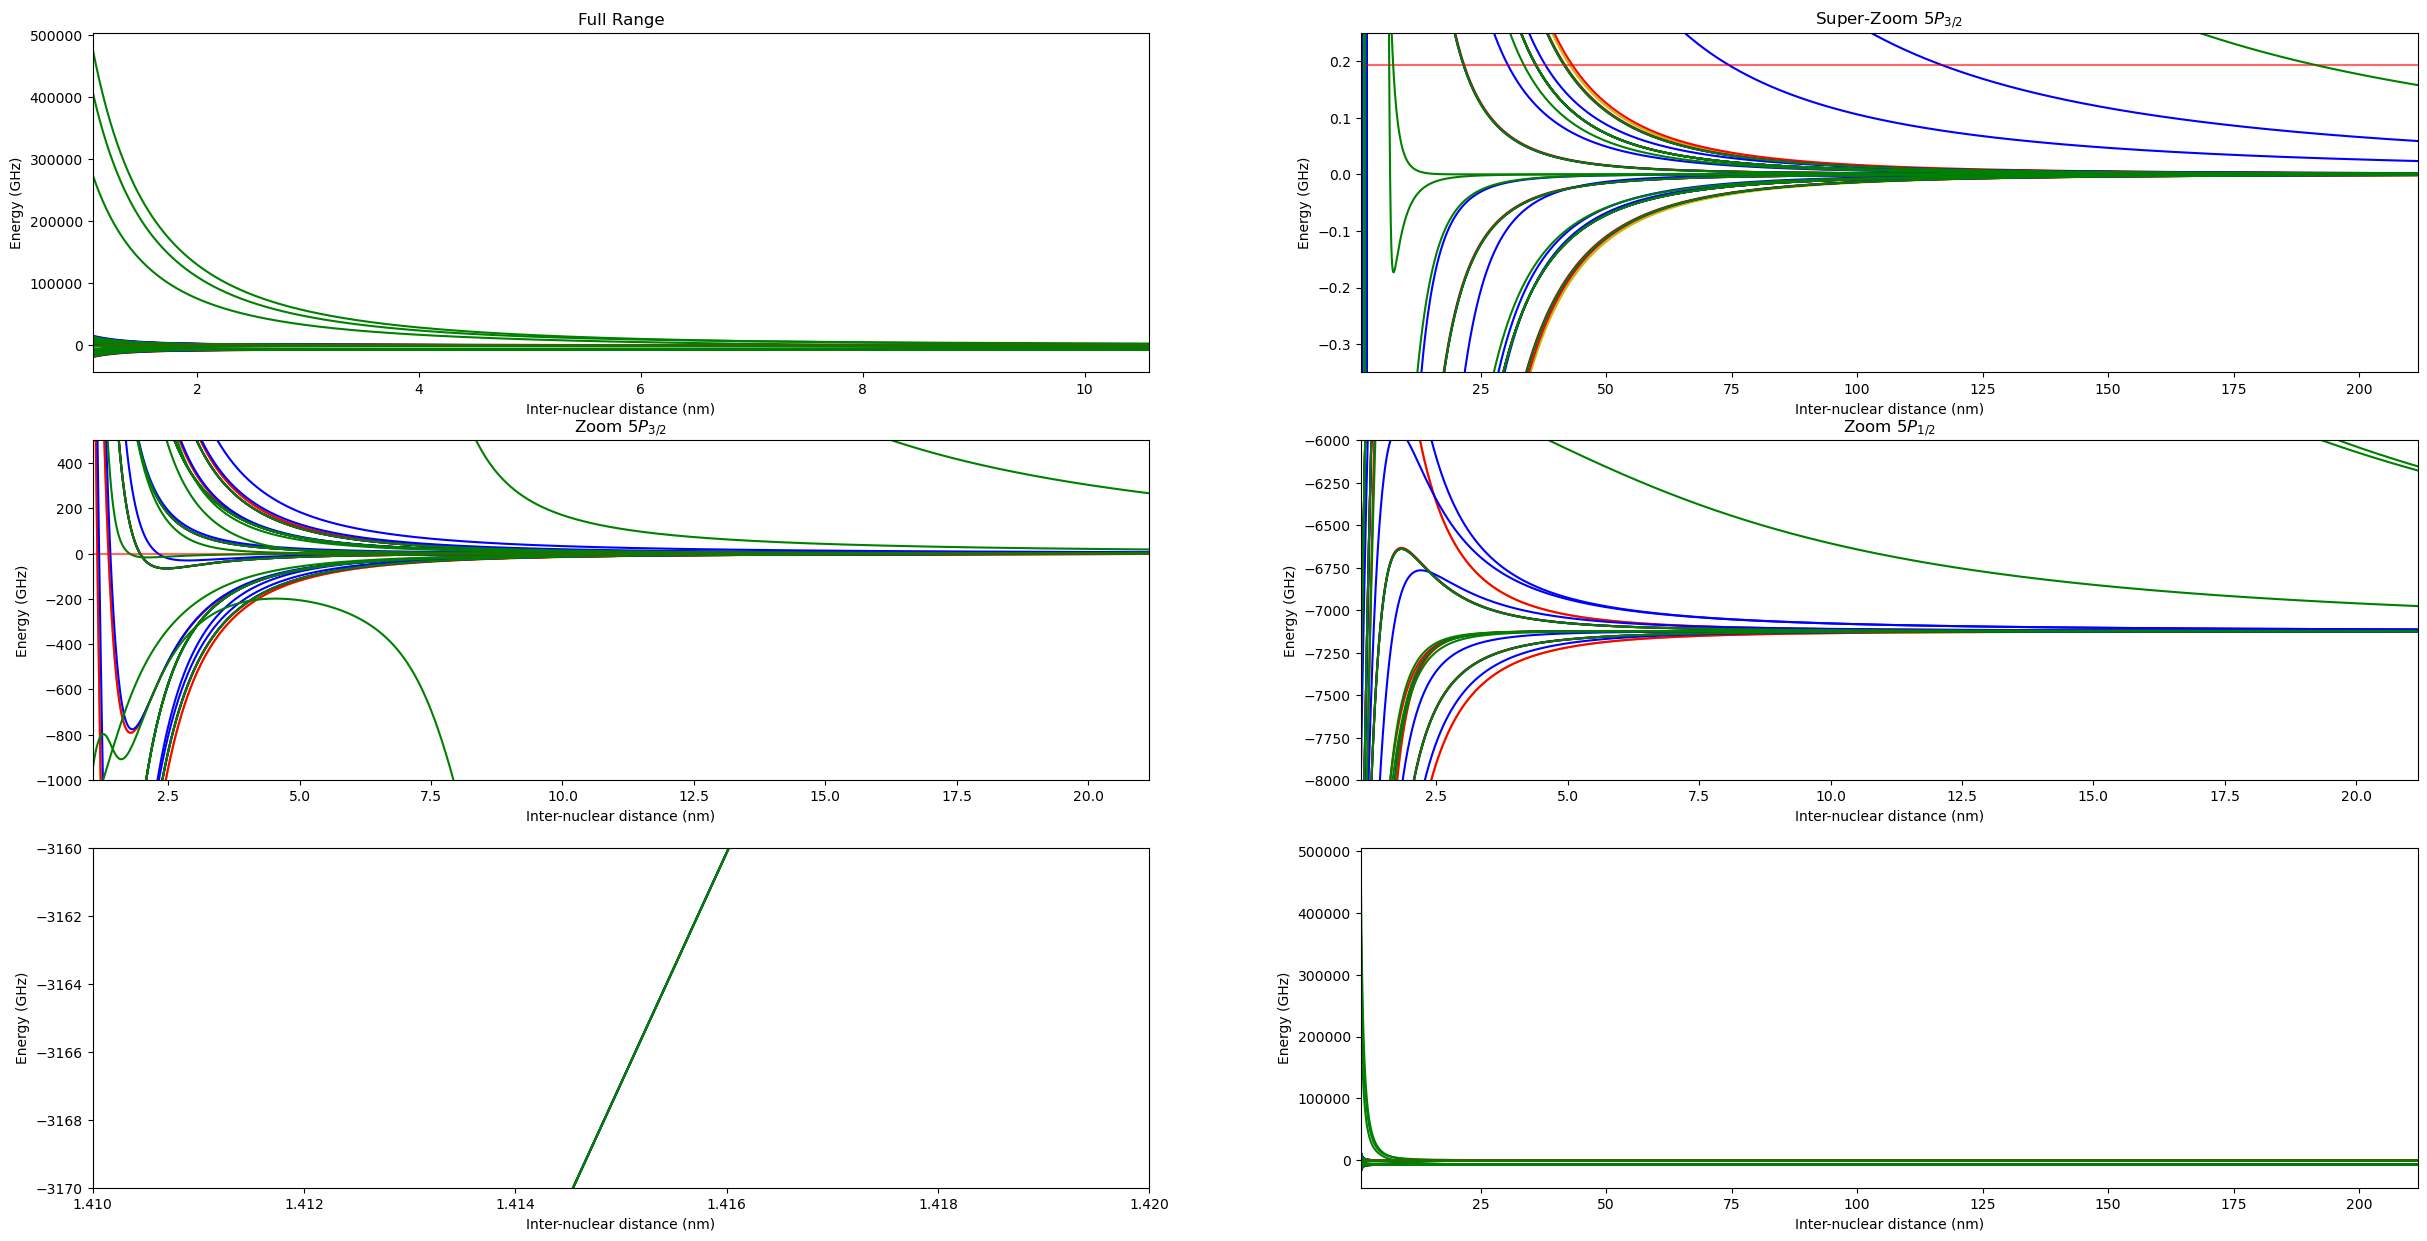

In [91]:
fig, axs = plt.subplots(3,2,figsize=(30,15))
for jvalnum, (J, color) in enumerate(zip(jvals, colors)):
    data = superdata[jvalnum]
    for ax in axs.flatten():
        #ax.axhline(-0.0729113, alpha=0.2,color='r')
        #ax.axhline(-0.2298518, alpha=0.2,color='r')
        #ax.axhline(-0.30207388, alpha=0.2,color='r')
        #ax.axhline(-DeltaVal* 1e-9 / mc.h+0.306246, alpha=0.2,color='r')
        #ax.axhline(-DeltaVal* 1e-9 / mc.h-0.510410, alpha=0.2,color='r')
        for mdata in misc.transpose(data):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h, color=color, linestyle='-')
        ax.set_xlabel('Inter-nuclear distance (nm)')
        ax.set_ylabel('Energy (GHz)')
        ax.grid(alpha=0.1)
        ax.axhline(0.1937408, alpha=0.2,color='r', label='F States')

    axs[0,0].set_title('Full Range')
    axs[0,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/20)
    #axs[0,0].legend(ncol=5,fontsize=14)
    axs[1,0].set_title('Zoom $5P_{3/2}$')
    axs[1,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
    axs[1,0].set_ylim(-1000, 500)
    axs[0,1].set_title('Super-Zoom $5P_{3/2}""$')
    axs[0,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    axs[0,1].set_ylim(-0.35, 0.25)
    axs[1,1].set_title('Zoom $5P_{1/2}$')
    axs[1,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
    axs[1,1].set_ylim(-8000, -6000);
    axs[2,0].set_xlim(1.41,1.42)
    axs[2,0].set_ylim(-3170,-3160)
    axs[2,1].set_xlim(min(Rvals)*1e9, max(Rvals)*1e9)
    #plt.savefig('Movre-Pischler-Super-Rotating.png', dpi=200)

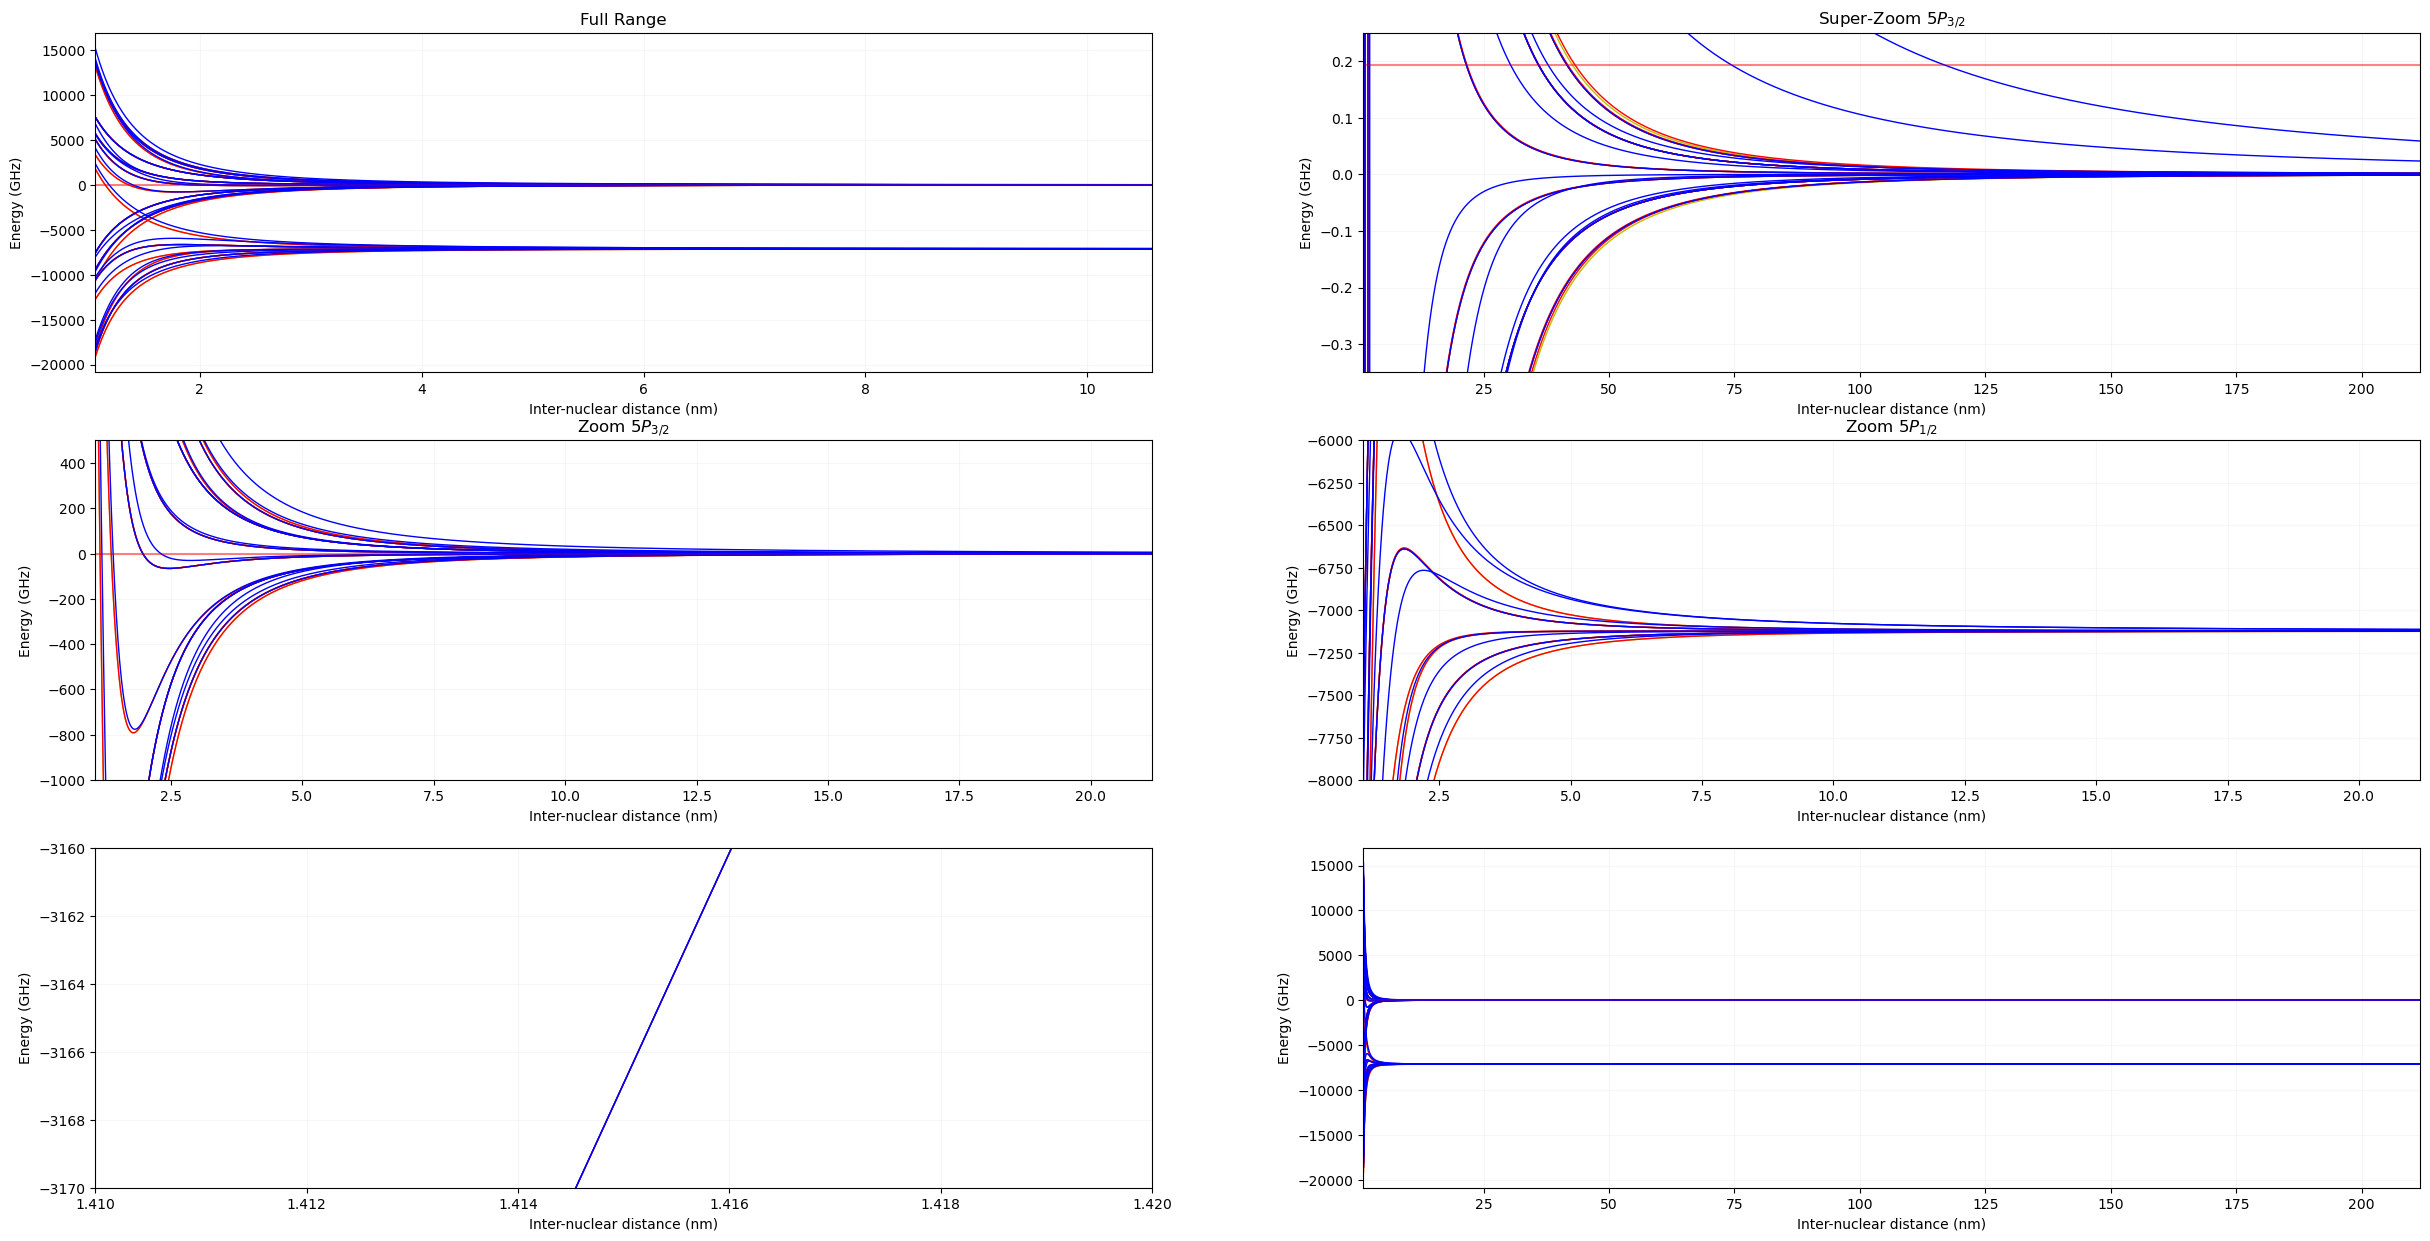

In [92]:
fig, axs = plt.subplots(3,2,figsize=(30,15))
for jvalnum, (J, color) in enumerate(zip(jvals[:-1], colors)):
    data = superdata[jvalnum]
    for ax in axs.flatten():
        #ax.axhline(-0.0729113, alpha=0.2,color='r')
        #ax.axhline(-0.2298518, alpha=0.2,color='r')
        #ax.axhline(-0.30207388, alpha=0.2,color='r')
        #ax.axhline(-DeltaVal* 1e-9 / mc.h+0.306246, alpha=0.2,color='r')
        #ax.axhline(-DeltaVal* 1e-9 / mc.h-0.510410, alpha=0.2,color='r')
        for mdata in misc.transpose(data):
            ax.plot(Rvals*1e9, np.array(mdata) * 1e-9 / mc.h, color=color, linestyle='-', linewidth=1)
        ax.set_xlabel('Inter-nuclear distance (nm)')
        ax.set_ylabel('Energy (GHz)')
        ax.grid(alpha=0.1)
        ax.axhline(0.1937408, alpha=0.2,color='r', label='F States')

    axs[0,0].set_title('Full Range')
    axs[0,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/20)
    #axs[0,0].legend(ncol=5,fontsize=14)
    axs[1,0].set_title('Zoom $5P_{3/2}$')
    axs[1,0].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
    axs[1,0].set_ylim(-1000, 500)
    axs[0,1].set_title('Super-Zoom $5P_{3/2}""$')
    axs[0,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9)
    axs[0,1].set_ylim(-0.35, 0.25)
    axs[1,1].set_title('Zoom $5P_{1/2}$')
    axs[1,1].set_xlim(min(Rvals)*1e9,max(Rvals)*1e9/10)
    axs[1,1].set_ylim(-8000, -6000);
    axs[2,0].set_xlim(1.41,1.42)
    axs[2,0].set_ylim(-3170,-3160)
    axs[2,1].set_xlim(min(Rvals)*1e9, max(Rvals)*1e9)
    #plt.savefig('Movre-Pischler-W-Rotation.png', dpi=200)

# Rotation with Hyperfine Structure